# **TD3 IA - Classify hand-written digits using a CNN**

## Objectives :
 - Recognizing handwritten digits
 - Understanding the principle of a classifier based on a Convolutional Neural NEtwork (CNN)
 - Implementation using Keras/TensorFlow


The [MNIST dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists in __60,000 small images__ of handwritten digits for __learning__ and __10,000__ for __testing__.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a CNN model
 - Train the model
 - Evaluate the result

## **Step 1 - Import and Init**

In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd

import sys,os
sys.path.append('..')

# Our Lib
#import tools.pwk as pwk

### Let's print the tools version

In [3]:
print("Tensor Flow version : " + tf.__version__)
print("Keras version : " + keras.__version__)
print("Numpy version : " + np.__version__)

Tensor Flow version : 2.19.0
Keras version : 3.10.0
Numpy version : 2.0.2


## Let's see if a GPU is available

In [4]:
import tensorflow.python.platform.build_info as build
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("CuDNN version: ", build.build_info['cudnn_version'])
print("Cuda version: ", build.build_info['cuda_version'])

Num GPUs Available:  0
CuDNN version:  9
Cuda version:  12.5.1


## **Step 2 - Retrieve data**
MNIST is one of the most famous historic dataset.  
This dataset is available from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [5]:
# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display the dimensions of the dataset
print("train_images : ", x_train.shape)
print("train_labels : ", y_train.shape)
print("test_images  : ", x_test.shape)
print("test_labels  : ", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images  :  (10000, 28, 28)
test_labels  :  (10000,)


### Plot training data

In [6]:
train_labels_count = np.unique(y_train, return_counts=True)
for i in range(len(train_labels_count[0])):
    print(f"Label {i} : {train_labels_count[1][i]}")

Label 0 : 5923
Label 1 : 6742
Label 2 : 5958
Label 3 : 6131
Label 4 : 5842
Label 5 : 5421
Label 6 : 5918
Label 7 : 6265
Label 8 : 5851
Label 9 : 5949


## <font color="red">**Exo1**</font> :
* Etudier le code python de la cellule précédente. Que représentent ces valeurs?
* Que constatez-vous à la vue de ces valeurs?
* Afficher le % pour chaque classe

<u>Vos réponses</u>:<br>

### Let us visualize some digits...

To visualize numbers, we can get help from matplotlib.<br>
When we run the code below, we will get the greyscale visualization of the RGB codes as shown below.

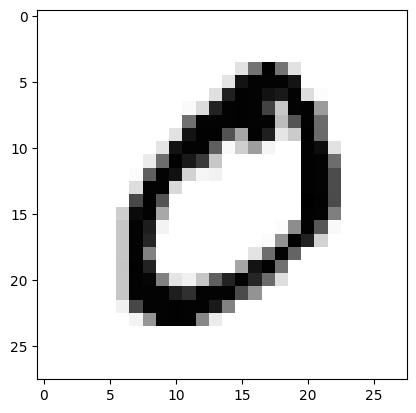

In [7]:
digit = x_train[1]
plt.imshow(digit, cmap='Greys')
plt.show()

## **Step 3 - Preparing the data**

#### Before training the model, data need to be preprocessed to
 - get the data in the form expected by the network (**reshape**)
 - get all input values between [0, 1] (**normalization**)

#### Reshape and normalize the data
  - To be able **to use the dataset in Keras API**, we **need 4-dims numpy arrays**. Therefore, we need to **reshape our 3-dims array into 4-dims array**.<br>
  - In addition, we **must normalize our data** as it is always required in neural network models. Here we **divide the data by 255** (which is the maximum value in grey scale).

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API (1 means that there is 1 channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)  # 1 means that there is 1 channel

print('x_train shape:', x_train.shape)
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# Normalizing the RGB codes by dividing it to the max RGB value.
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## **Step 4 - Build a CNN model with Keras**

Let's build a first CNN model

In [11]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten())

model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

### Let's summarize the constructed model

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

## <font color="red">**Exo2**</font> : Etude du modèle CNN
* Combien de couches de convolution comporte ce modèle ?
* Combien de filtres de convolution sont appliqués aux images d'entrée?
6 filtres
* Quelles sont les dimensions des filtres de convolution ?
3x3
* Quelle est la taille et le type du filtre de pooling?

* Combien de couches de neurones sont utilisées dans la partie fully-connected ?
* Combien de neurones par couche sont utilisées dans la partie fully-connected ?

* Dessiner sur une feuille (ou avec un logiciel, c'est encore mieux) **l'architecture du CNN** que nous venons de modéliser
  * Faire apparaître les différentes **couches**, les **fonctions réalisées** et les **dimensions**
  * Insérer l'image (utilisez votre téléphone et rangez-le après ;o)) dans votre notebook

* Combien de paramètres entrainables comportent ce modèle?
* Retrouver par le calcul ce nombre.
* Comparer le nombre de paramètres entrainables du CNN par rapport aux modèles MLP du td2.

<u>Vos réponses</u>:<br>

## Train the model

#### Let's initialize hyper parameters before training the model

In [70]:
epochs      =  16     # an epoch is one complete pass through the training data (all the training data are seen by the model)
                      # here, the model will see 20 times the complete training set
batch_size  = 512     # the batch size is the number of training samples processed before the model is updated,
                      # in other words the number of training examples in one forward/backward pass.
                      # The higher the batch size, the more memory space but the faster the training time.
# The number of iterations per epoch is defined as the ratio between the size of training set and the batch size.
# Here, it will be equal to 60000/512 = 118
learning_rate = 0.01  # the learning rate controls how much to change the model in response to the estimated error
                      # each time the model weights are updated

#### Let's compile the model.
When compiling the model, we need to indicate :
 - an **optimizer** : the purpose of an optimizer is to adjust model parameters (weights and biaises) to minimize an error function (i.e. the loss)
 - a **loss function** : it is a function that compares the target and predicted output values; it measures how well the neural network models the training data. When training, we aim to minimize this loss between the predicted and target outputs.
 - some **metrics** : metrics are used to monitor and measure the performance of a model (during training and testing)

Remark : It is possible to experiment with the optimizer, loss function, metrics (and epochs). Note that the adam optimizer usually out-performs the other optimizers...<br>

In [14]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer='adam',                          # default learning rate = 0.001
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Let's train the model
 - Keras `fit` is the method used for the model training on the data set for the specified number of fixed epochs.
 - Here, 20% of the training set (validation set) is used to evaluate the model during the training
 - The number of iterations per epoch is therefore equal to : (60000*0.8)/batch_size = 94 iterations
 - At each iteration, the parameters (weights and biaises) are updated

In [15]:
history = model.fit(  x_train, y_train,
                      batch_size       = batch_size,
                      epochs           = epochs,
                      verbose          = 1,
                      validation_split = 0.2)

Epoch 1/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.3840 - loss: 1.7969 - val_accuracy: 0.9096 - val_loss: 0.3514
Epoch 2/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.8365 - loss: 0.5273 - val_accuracy: 0.9476 - val_loss: 0.1913
Epoch 3/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.8959 - loss: 0.3442 - val_accuracy: 0.9583 - val_loss: 0.1420
Epoch 4/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9183 - loss: 0.2708 - val_accuracy: 0.9659 - val_loss: 0.1158
Epoch 5/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.9338 - loss: 0.2233 - val_accuracy: 0.9697 - val_loss: 0.1021
Epoch 6/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.9395 - loss: 0.2005 - val_accuracy: 0.9747 - val_loss: 0.0877
Epoch 7/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9453 - loss: 0.1818 - val_accuracy: 0.9760 - val_loss: 0.0825
Epoch 8/16
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.9493 - loss: 0.1674 - val_accu

## **Step 6 - Evaluate the model**

Let's evaluate the model after training on **10000 test images**.<br>
This part of the dataset (the test) has **never been seen before by the model**.<br>
It is therefore a way to evaluate the **capability of the model to generalize** on new data...

In [16]:
# Batch size is by default equal to 32 for the Keras evaluate function
score = model.evaluate(x_test, y_test, verbose=1)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]*100:4.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.0553
Test loss     : 0.0449
Test accuracy : 98.55%


#### Let's display the history of the loss according to the number of epoch

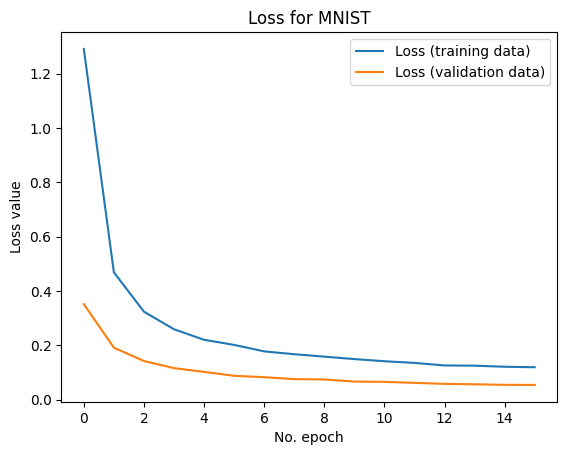

In [17]:
# Plot history of the loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for MNIST')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

#### Let's display the history of the accuracy according to the number of epoch

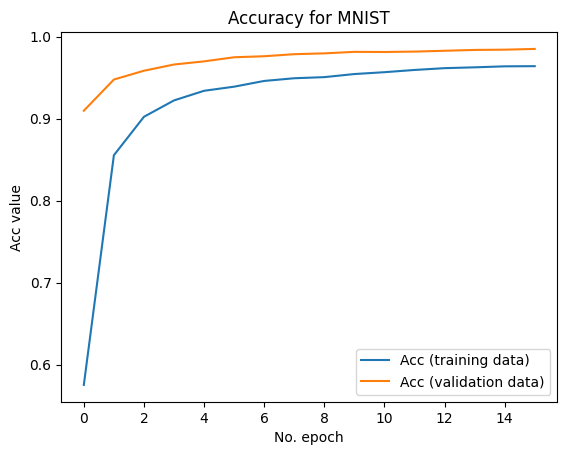

In [18]:
# Plot history (Accuracy):
plt.plot(history.history['accuracy'], label='Acc (training data)')
plt.plot(history.history['val_accuracy'], label='Acc (validation data)')
plt.title('Accuracy for MNIST')
plt.ylabel('Acc value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## <font color="red">**Exo3**</font> : Performance du CNN
+ Quelle précision obtenez-vous pour les données de test avec le CNN?
+ Sur les 10000 données de test, combien de chiffres ont été classifiés incorrectement par le CNN?  
+ Comparez les résultats obtenus entre les MLP du td2 et ce CNN en termes
  + de précision (en %),
  + de nombre d'erreurs (ou nb de chiffres classifiés incorrectement)
  + et de nombre de paramètres
+ Conclure

<u>Vos réponses</u>:<br>

## **Affichage de la matrice de confusion matrix et des metriques de performance (precision, recall and f1-score)**

#### Performance metrics

In [19]:
labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# The predict function returns a 2-dimension array (10000, 10).
# For each test input, it returns a probability for the 10 output classes
y_softmax = model.predict(x_test)

# The argmax numpy function returns the class having the highest probability
y_pred    = np.argmax(y_softmax, axis=-1)

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0     0.9769    0.9939    0.9853       980
           1     0.9921    0.9965    0.9943      1135
           2     0.9855    0.9893    0.9874      1032
           3     0.9851    0.9832    0.9841      1010
           4     0.9939    0.9888    0.9913       982
           5     0.9910    0.9843    0.9876       892
           6     0.9926    0.9843    0.9885       958
           7     0.9721    0.9844    0.9783      1028
           8     0.9875    0.9754    0.9814       974
           9     0.9791    0.9732    0.9761      1009

    accuracy                         0.9855     10000
   macro avg     0.9856    0.9853    0.9854     10000
weighted avg     0.9855    0.9855    0.9855     10000



#### Confusion Matrix

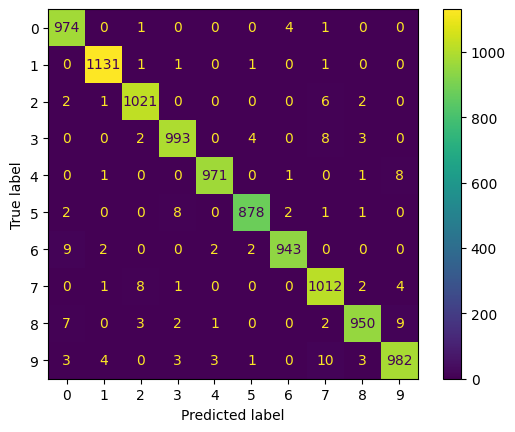

In [20]:
# Let's display the confusion matrix using scikit-learn python library
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## <font color="red">**Exo4**</font> : Etude des résultats
* Etudier les résultats statistiques générés
* Revoir la définition des mesures de performance vue en cours (`accuracy`, `precision`, `recall` et `f1-score`).
* Dans quel cas faut-il plutot utiliser la précision, le recall ou le f1-score?
* A partir des résultats de la matrice de confusion, expliquer avec quelle chiffre le 4 est-il le plus confondu en terme de faux positifs (et combien de fois)? Comment expliquez-vous cela?
* Pour quel chiffre la precision est la meilleure ?
* Pour quel chiffre le recall (ou sensibilité) est le meilleur ?

<u>Vos réponses</u>:<br>

## <font color="red">**Exo5**</font> : Sauvegarde du modèle entrainé

### Sauvegarder votre modèle CNN entrainé en tant que fichier HDF5

**Keras** possède un **format de sauvegarde** utilisant le HDF5 dont l'extension est .h5 (https://en.wikipedia.org/wiki/Hierarchical_Data_Format) standard.<br>

In [21]:
# Mettre votre code dans cette cellule
model.save('CNN_MNIST_model.h5')

### Maintenant on peut **re-générer le modèle** depuis le dernier fichier :

In [22]:
# Recréé exactement le même model, incluant poids et optimizer.
loaded_model = tf.keras.models.load_model('CNN_MNIST_model.h5')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,360 (165.47 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Evaluation du modèle rechargé

In [23]:
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {loss} - Accuracy: {acc}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.0553
Test results - Loss: 0.04489757493138313 - Accuracy: 0.9854999780654907%


## **Prédiction de chiffres sur des données de test**

La fonction `predict` permet de classifier une image passée en paramètre (ici un chiffre)

Test prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
0 Prediction : 7


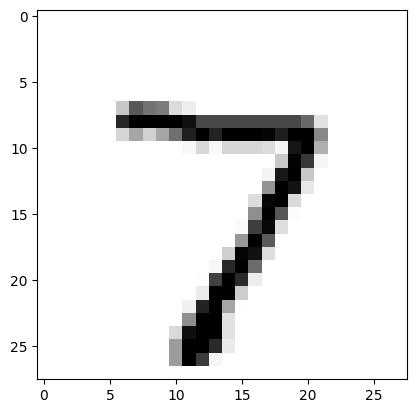

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1 Prediction : 2


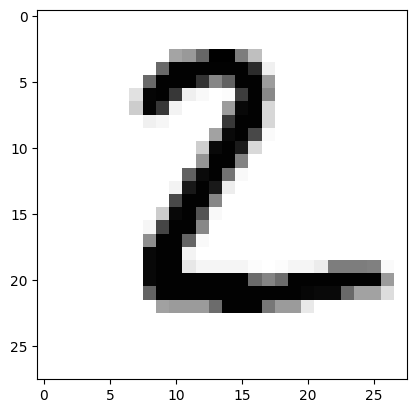

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2 Prediction : 1


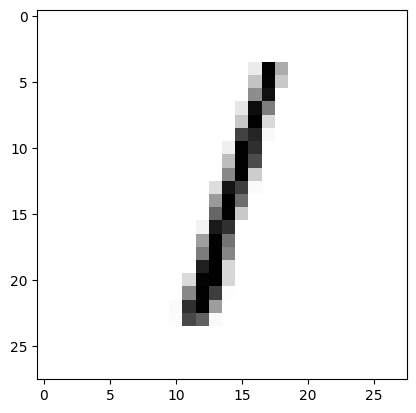

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3 Prediction : 0


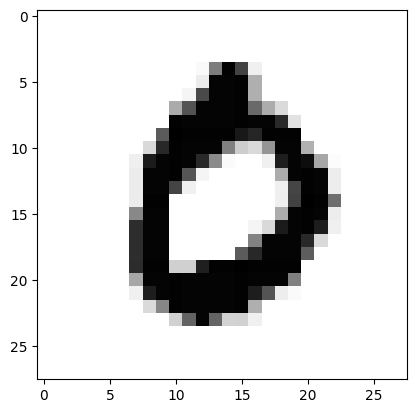

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4 Prediction : 4


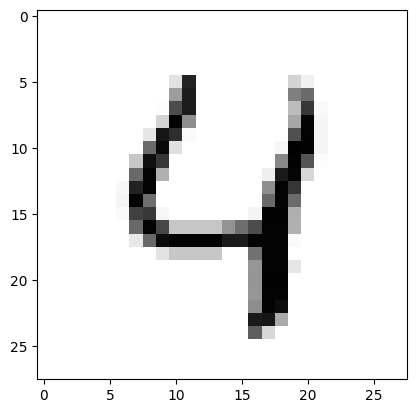

In [24]:
print ("Test prediction")
for x in range(0, 5) :
    to_predict = np.reshape(x_test[x], (1,28,28,1))    # l'entrée du CNN est une tenseur 28*28*1
    test_prediction = loaded_model.predict(to_predict)
    print(x, "Prediction :", np.argmax(test_prediction))
    Image_name = "Prediction : "+ str(np.argmax(test_prediction))    # le résultat est le digit qui a la plus grande probabilité
    plt.imshow(x_test[x].reshape(28,28), cmap='Greys')
    plt.show()

## <font color="red">**Exo6**</font> : Faire une prédiction "homemade" à partir d'un digit dessiné sur paint

#### Dessinez un chiffre en utilisant Paint par exemple. Sauvegarder le fichier en 28*28 pixels en "homemade.jpg" puis déplacez ce fichier là où se trouve le notebook jupyter (td3.ipynb) sur Colab (cf. le TD1)

In [96]:
# Transforme le .jpg en tableau de valeur (array)
img = Image.open('/content/homemade_5.jpg').convert("L")
im2arr0 = np.array(img)

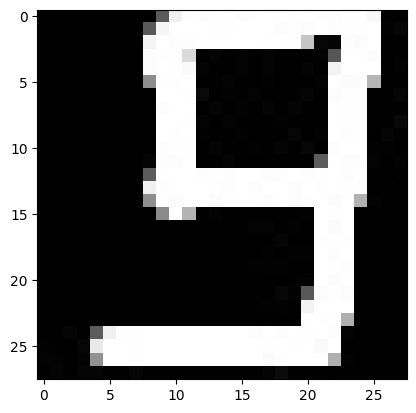

In [97]:
# On affiche l'image
plt.imshow(im2arr0, cmap='Greys')
plt.show()

In [98]:
# Enlever le commentaire s'il est nécessaire d'inverser les niveaux de gris (blanc->noir et noir->blanc)
#im2arr0 = 255 - im2arr0

In [99]:
# On reshape l'image pour pouvoir faire la prédiction avec le modèle CNN
im2arr = np.reshape(im2arr0, (1,28,28,1))

# On lance la prédiction
homemade_prediction = loaded_model.predict(im2arr, verbose=1)

# Et on affiche le résultat de la prédiction
print("Homemade digit prediction : ", np.argmax(homemade_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Homemade digit prediction :  8


## <font color="red">**Exo7**</font> : Changement des hyper-paramètres

Les hyper-paramètres sont les paramètres qui ne sont pas entrainables (contrairement aux poids et aux biais du modèle).<br>
C'est au data scientist de fixer la valeur des différents hyper-paramètres...<br>
Dans cet exercice, vous allez tester les performances du modèle CNN avec d'autres valeurs d'hyper-paramètres.
+ **Changer le learning rate** de 0.01 à 0.1 et relancer l'entrainement du modèle. Que constatez-vous ? Expliquer.
+ Relancer l'entrainement du modèle avec **32 epoch (au lieu de 16)** puis afficher la loss et l'accuracy en fonction du nombre d'epoch. Conclure.
+ Relancer l'entrainement du modèle avec un **batch size de 1024 (au lieu de 512)**. Qu'est-ce que cela change? Quels sont les risques d'augmenter le batch size? Comparer le temps d'entrainement pour ces 2 valeurs de batch size. Conclure.


## <font color="red">**Exo8**</font> : CNN model 2
 - Construisez un 2ème modèle de réseau de neurones convolutionnel (CNN).<br>
 - Réponde aux questions de l'exo2 sur ce nouveau modèle CNN.
 - Entrainer et evaluer ce modèle. Comparer avec le premier modèle CNN. Conclure.

Ce réseau est constitué des couches suivantes:
- 1 couche de **Convolution** avec **32 filtres** (kernel 3*3, activation relu)
- 1 couche de **max pooling 2*2**
- 1 couche de **dropout** (0.2)

- 1 couche de **Convolution** avec **64 filtres** (kernel 3*3, activation relu)
- 1 couche de **max pooling 2*2**
- 1 couche de **dropout** (0.2)

- 1 couche de **Convolution** avec **64 filtres** (kernel 3*3)
- 1 couche de **dropout** (0.2)
- Après un flatten...
- 1 couche **Dense** de **64 neurones** (activation relu)
- 1 couche de **dropout** (0.5)

- 1 couche **Dense** de sortie de **10 neurones** (activation softmax)

## Définition du modèle CNN n°2

In [ ]:
model2 = keras.models.Sequential()

model2.add( keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
# A COMPLETER


## Etude du modèle

## Compilation et Entrainement du modèle

## Evaluation du modèle sur les données de test

## Affichage des métriques et de la matrice de confusion

## Etude des résultats (comparaison avec le 1er modèle CNN)